In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
#import os
#from os.path import normpath
%matplotlib inline

In [64]:
#csv_path = normpath("C:\\Users\\arkedzie\Documents\__prv\_#5DWCHALLENGE\Challenge_3\\beta_simulator_windows\dane\driving_log.csv")
#csv_path  = normpath("C:/Users/arkedzie/Documents/__prv/_#5DWCHALLENGE/Challenge_3/beta_simulator_windows/dane/driving_log.csv")
csv_path = r'C:\Users\arkedzie\Documents\__prv\_#5DWCHALLENGE\Challenge_3\beta_simulator_windows\dane\driving_log.csv'
df = pd.read_csv(csv_path , names=['center', 'left', 'right', 'streering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,streering_angle,throttle,break,speed
0,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,0.0,0.000000,0,5.118596
1,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,0.0,0.000000,0,5.087718
2,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,0.0,0.000000,0,5.036669
3,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,0.0,0.000000,0,5.006286
4,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,C:\Users\arkedzie\Documents\__prv\_#5DWCHALLEN...,0.0,0.027786,0,4.971440


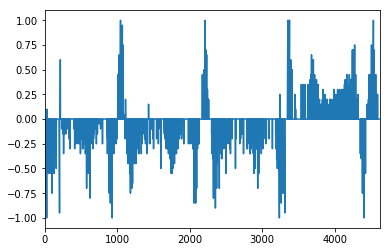

In [65]:
df['streering_angle'].plot()

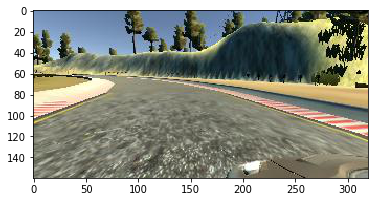

In [66]:
img = Image.open(df['left'][0])
plt.imshow(img)

In [70]:
#konwersja jpg do macierzy numpy
img = np.asarray(img)
img.shape

(160, 320, 3)

In [71]:
#definujemy funkcję do wczytywania
def loadImage(fname):
    return np.asarray(Image.open(fname))

#definujemy funkcję do obcinania zdjęć do wymaganego rozmiaru
def process_image(img):
    return img[10:130:2, ::4, :]

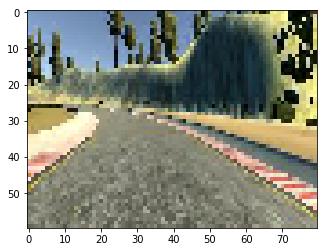

In [73]:
img = process_image(loadImage(df['left'][0]))
plt.imshow(img)

In [75]:
# przygotowanie danych do uczenia.
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]

y = df['streering_angle'].values
y = np.concatenate([y, y+0.4, y-0.4])

In [76]:
X = np.array(X)
print(X.shape)
print(y.shape)

(13869, 60, 80, 3)
(13869,)


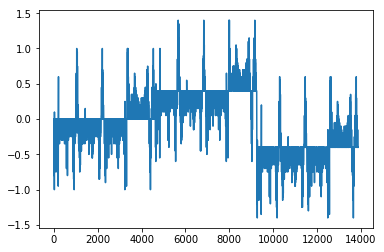

In [77]:
plt.plot(y)
plt.show();

In [78]:
np.save('X.npy', X)
np.save('Y.npy', y)